In [1]:
# oltás
# SIR_D
import numpy as np

beta_vaccine = 1
beta_virus = 3
gamma_vaccine = 1
gamma_virus = 1
mu_vaccine = 0.0001
mu_virus = 0.01    

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_vaccine=np.zeros([nsteps+1])
v_I_virus=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.98
v_I_vaccine[0] = 0.01
v_I_virus[0] = 0.01

for t in range(nsteps):
    mu_vaccine_1 = mu_vaccine+mu_vaccine*v_I_vaccine[t]
    mu_virus_2 = mu_virus+mu_virus*v_I_virus[t]
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_vaccine*v_I_vaccine[t]+beta_virus*v_I_virus[t])
    v_I_vaccine[t+1]=v_I_vaccine[t]+dt*beta_vaccine*v_S[t]*v_I_vaccine[t]-gamma_vaccine*v_I_vaccine[t]*dt
    v_I_virus[t+1]=v_I_virus[t]+dt*beta_virus*v_S[t]*v_I_virus[t]-gamma_virus*v_I_virus[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_vaccine_1)*gamma_vaccine*v_I_vaccine[t]*dt+(1-mu_virus_2)*gamma_virus*v_I_virus[t]*dt
    v_D[t+1]=v_D[t]+mu_vaccine_1*gamma_vaccine*v_I_vaccine[t]*dt+mu_virus_2*gamma_virus*v_I_virus[t]*dt

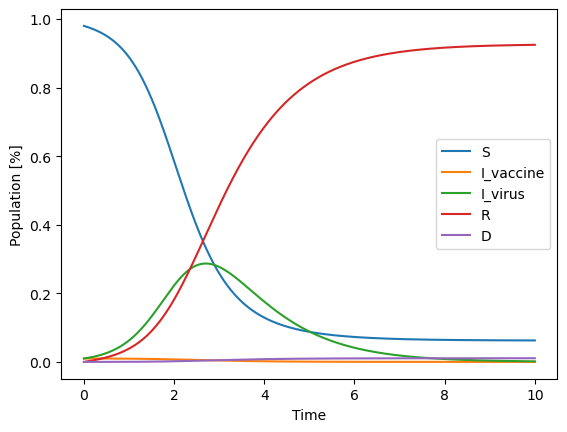

In [3]:
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_vaccine,label='I_vaccine')
plt.plot(trange,v_I_virus,label='I_virus')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_virus_vaccine_3_1_.png', bbox_inches='tight') #Ábra mentése